## online gaming behavior analysis

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
data_online_gaming = pd.read_csv("online_gaming_behavior_insights.csv")
data_online_gaming.head(5)

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [83]:
data_online_gaming.columns

Index(['PlayerID', 'Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours',
       'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked',
       'EngagementLevel'],
      dtype='object')

In [84]:
data_online_gaming.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [85]:
data_online_gaming.describe()

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


In [86]:
data_online_gaming.isnull().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

In [87]:
#correlation matrix
matrix = data_online_gaming.select_dtypes(include=['int64','float64'])
corr = matrix.corr()
display(corr) #can use print but display keeps it concise

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
PlayerID,1.000000,-0.003044,0.000923,0.002321,-0.005944,-0.001801,-0.001769,0.003190
Age,-0.003044,1.000000,0.002462,-0.000186,0.008777,-0.002269,0.001353,-0.001100
PlayTimeHours,0.000923,0.002462,1.000000,-0.006067,-0.003655,-0.001925,-0.005152,0.003913
InGamePurchases,0.002321,-0.000186,-0.006067,1.000000,0.005132,-0.003059,0.006524,0.000098
SessionsPerWeek,-0.005944,0.008777,-0.003655,0.005132,1.000000,-0.000620,0.003257,0.003187
AvgSessionDurationMinutes,-0.001801,-0.002269,-0.001925,-0.003059,-0.000620,1.000000,0.001368,-0.002227
PlayerLevel,-0.001769,0.001353,-0.005152,0.006524,0.003257,0.001368,1.000000,0.006343
AchievementsUnlocked,0.003190,-0.001100,0.003913,0.000098,0.003187,-0.002227,0.006343,1.000000


In [88]:
data_online_gaming.Gender.value_counts()

Gender
Male      23959
Female    16075
Name: count, dtype: int64

In [89]:
round(data_online_gaming.Gender.value_counts()/len(data_online_gaming)*100)

Gender
Male      60.0
Female    40.0
Name: count, dtype: float64

In [90]:
round(data_online_gaming.Location.value_counts()/len(data_online_gaming)*100)

Location
USA       40.0
Europe    30.0
Asia      20.0
Other     10.0
Name: count, dtype: float64

In [91]:
round(data_online_gaming.GameGenre.value_counts()/len(data_online_gaming)*100,2)

GameGenre
Sports        20.10
Action        20.08
Strategy      20.01
Simulation    19.94
RPG           19.86
Name: count, dtype: float64

In [92]:
round(data_online_gaming.GameDifficulty.value_counts()/len(data_online_gaming)*100)

GameDifficulty
Easy      50.0
Medium    30.0
Hard      20.0
Name: count, dtype: float64

In [93]:
round(data_online_gaming.EngagementLevel.value_counts()/len(data_online_gaming)*100)

EngagementLevel
Medium    48.0
High      26.0
Low       26.0
Name: count, dtype: float64

In [94]:
data_online_gaming.groupby("EngagementLevel")[["PlayTimeHours",
                                               "SessionsPerWeek",
                                               "AvgSessionDurationMinutes",
                                               "PlayerLevel",
                                               "InGamePurchases"]].mean()

,PlayTimeHours,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,InGamePurchases
EngagementLevel,,,,,
High,12.069238,14.254547,131.921827,50.823723,0.206463
Low,12.104915,4.530511,66.882119,46.101414,0.197307
Medium,11.957503,9.553267,89.856405,50.926293,0.199752


### engagement score

In [95]:
data_online_gaming["EngagementScore"] = (0.35*data_online_gaming["PlayTimeHours"]+
                                         0.25*data_online_gaming["SessionsPerWeek"]+
                                         0.25*data_online_gaming["AvgSessionDurationMinutes"]+
                                         0.10*data_online_gaming["PlayerLevel"]+
                                         0.05*data_online_gaming["InGamePurchases"])

In [96]:
data_online_gaming["EngagementScore"].head()

0    42.094892
1    40.284086
2    45.878314
3    31.092873
4    48.186181
Name: EngagementScore, dtype: float64

In [97]:
print(round(data_online_gaming["EngagementScore"].mean(),2))

35.25


In [98]:
data_online_gaming["EngagementScore"].describe()

count    40034.000000
mean        35.250134
std         12.889047
min          3.273186
25%         24.636311
50%         35.280117
75%         45.882379
max         66.216582
Name: EngagementScore, dtype: float64

<Axes: >

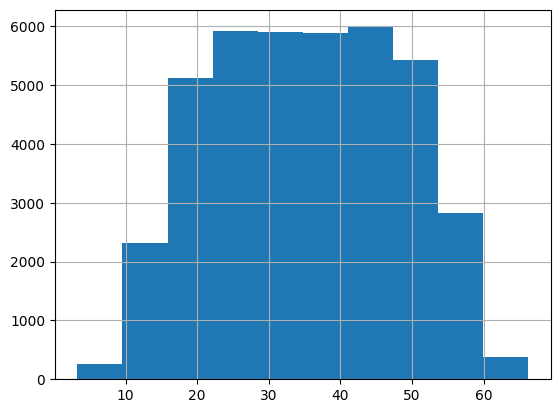

In [99]:
data_online_gaming["EngagementScore"].hist()

##### high engagement players

##### creating equal bins to check the distribution

In [100]:
data_online_gaming["EngagementBins"]=pd.qcut(
    data_online_gaming["EngagementScore"],
    q=3,
    labels=["low","medium","high"]
)

##### low engagement players

In [101]:
low_engagement_player = data_online_gaming[data_online_gaming["EngagementBins"]=="low"]
preferredGenre = low_engagement_player["GameGenre"].value_counts().idxmax()
print("Low engagement players prefer", preferredGenre, "genre")

Low engagement players prefer Simulation genre


##### high engagement players

In [102]:
high_engagement_player = data_online_gaming[data_online_gaming["EngagementBins"]=="high"]
preferred_genre = high_engagement_player["GameGenre"].value_counts().idxmax()
print("High engagement players prefer", preferred_genre, "genre")

High engagement players prefer Strategy genre


In [103]:
data_online_gaming["EngagementScore"].describe()

count    40034.000000
mean        35.250134
std         12.889047
min          3.273186
25%         24.636311
50%         35.280117
75%         45.882379
max         66.216582
Name: EngagementScore, dtype: float64

In [104]:
round(data_online_gaming.groupby("GameGenre")["EngagementScore"].mean().sort_values(),2)

GameGenre
RPG           34.94
Simulation    35.14
Action        35.31
Sports        35.32
Strategy      35.52
Name: EngagementScore, dtype: float64

### Task 1: segment filtering

In [105]:
segment_filtering = data_online_gaming.groupby("EngagementBins", observed=True).agg({
    "PlayTimeHours":"mean",
    "InGamePurchases":"mean",
    "AvgSessionDurationMinutes":"mean",
    "SessionsPerWeek":"mean"
}).round(2)

#top genres for each segment
top_genres = data_online_gaming.groupby("EngagementBins", observed=True)["GameGenre"].agg(lambda x: x.value_counts().idxmax())

#creating a separate table
segment_filtering["TopGenre"]=top_genres
print(segment_filtering)

                PlayTimeHours  InGamePurchases  AvgSessionDurationMinutes  \
EngagementBins                                                              
low                     10.87              0.2                      40.46   
medium                  11.99              0.2                      94.83   
high                    13.22              0.2                     149.08   

                SessionsPerWeek    TopGenre  
EngagementBins                               
low                        8.87  Simulation  
medium                     9.50      Action  
high                      10.05    Strategy  


### Task 2: feature importance

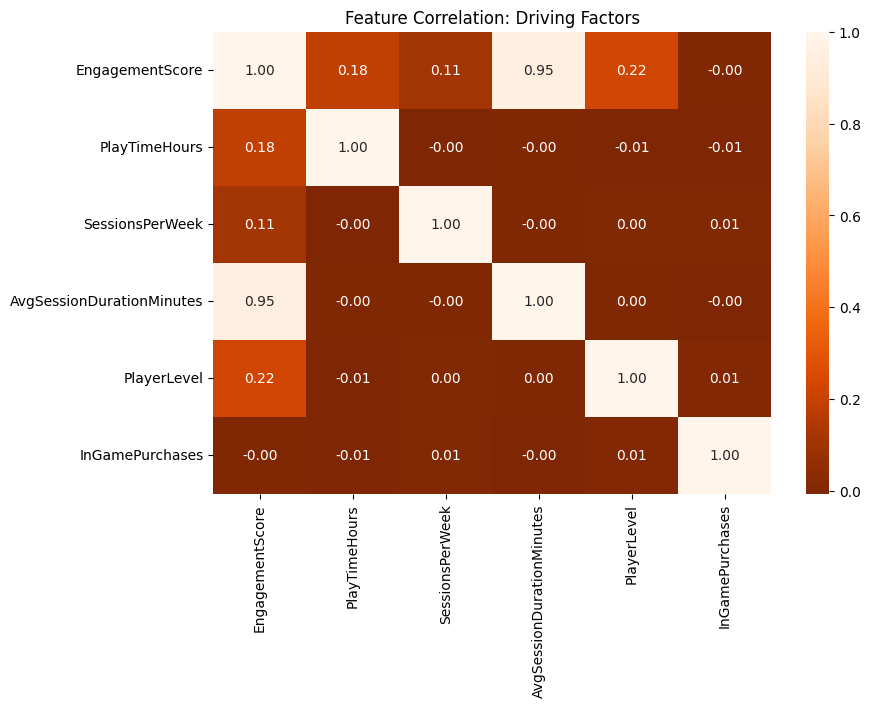

In [106]:
features = ["EngagementScore","PlayTimeHours","SessionsPerWeek","AvgSessionDurationMinutes","PlayerLevel","InGamePurchases"]
plt.figure(figsize=(9,6))
sns.heatmap(data_online_gaming[features].corr(), annot=True, cmap="Oranges_r", fmt=".2f")
plt.title("Feature Correlation: Driving Factors")
plt.savefig("feature_correlation.png")
plt.show()

### Task 3: Market Analysis: Monetization by Segment

/var/folders/2p/hw866b9n2z371gm8s8nn4pf40000gn/T/ipykernel_58198/4217666575.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monetization, x="EngagementBins",y="InGamePurchases",palette="magma")


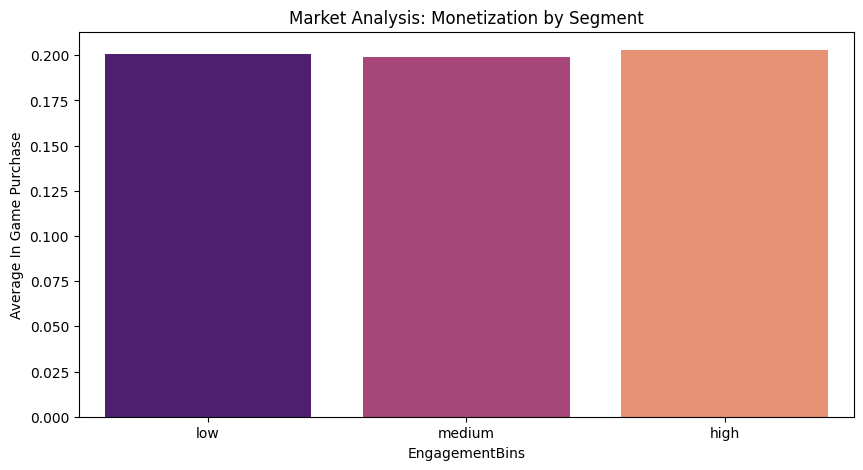

In [107]:
monetization = data_online_gaming.groupby("EngagementBins", observed=True)["InGamePurchases"].mean().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=monetization, x="EngagementBins",y="InGamePurchases",palette="magma")
plt.title("Market Analysis: Monetization by Segment")
plt.ylabel("Average In Game Purchase")
plt.savefig("market_analysis.png")
plt.show()

### Task 4: Product Analysis: Retention by Genre

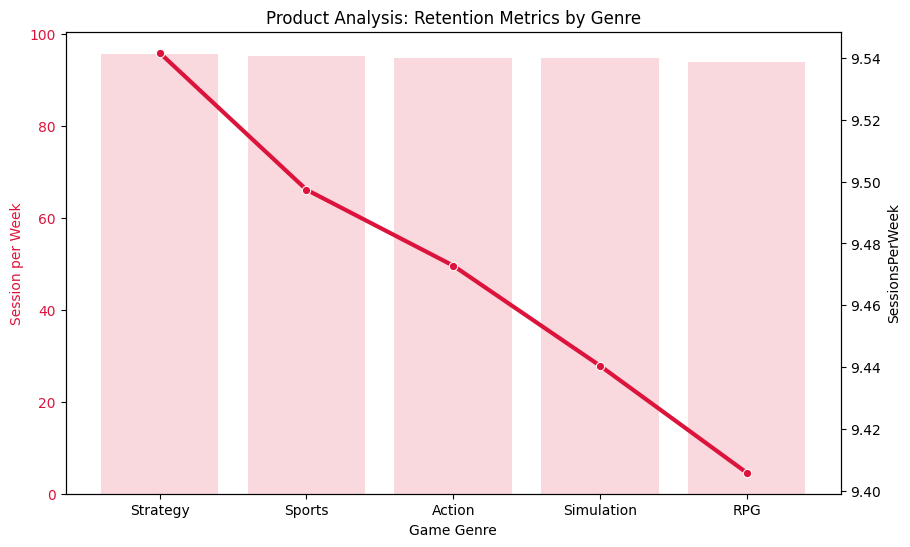

In [108]:
retention = data_online_gaming.groupby("GameGenre").agg({
    "AvgSessionDurationMinutes":"mean",
    "SessionsPerWeek":"mean"
}).sort_values("AvgSessionDurationMinutes",ascending=False).reset_index()

fig,ax1=plt.subplots(figsize=(10,6))
ax1.set_xlabel("Game Genre")
ax1.set_ylabel("Avg session duration (min)", color = 'pink')
sns.barplot(data=retention, x="GameGenre", y="AvgSessionDurationMinutes",ax=ax1, alpha=0.7, color='pink')
ax1.tick_params(axis="y", labelcolor='pink')

ax2=ax1.twinx()
ax1.set_ylabel("Session per Week", color = 'crimson')
sns.lineplot(data=retention, x="GameGenre", y="SessionsPerWeek",ax=ax2, marker='o', color='crimson', linewidth=3)
ax1.tick_params(axis="y", labelcolor='crimson')

plt.title("Product Analysis: Retention Metrics by Genre")
plt.savefig("retention.png")
plt.show()

### Task 5: Gaming KPIs

In [109]:
#retention
data_online_gaming["retained"]=data_online_gaming["SessionsPerWeek"]>7
retention = data_online_gaming.groupby("EngagementBins")["retained"].mean()*100
print(retention.round(2))

EngagementBins
low       55.34
medium    59.70
high      63.27
Name: retained, dtype: float64


/var/folders/2p/hw866b9n2z371gm8s8nn4pf40000gn/T/ipykernel_58198/3515819273.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  retention = data_online_gaming.groupby("EngagementBins")["retained"].mean()*100


In [110]:
#conversion
conversion = data_online_gaming.groupby("EngagementBins")["InGamePurchases"].mean()*100
print(conversion.round(2))

EngagementBins
low       20.06
medium    19.91
high      20.28
Name: InGamePurchases, dtype: float64


/var/folders/2p/hw866b9n2z371gm8s8nn4pf40000gn/T/ipykernel_58198/3464692811.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion = data_online_gaming.groupby("EngagementBins")["InGamePurchases"].mean()*100


In [111]:
#ARPU
arpu = data_online_gaming.groupby("EngagementBins")["InGamePurchases"].mean()*5.0
print(arpu.round(2))

EngagementBins
low       1.00
medium    1.00
high      1.01
Name: InGamePurchases, dtype: float64


/var/folders/2p/hw866b9n2z371gm8s8nn4pf40000gn/T/ipykernel_58198/622349664.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  arpu = data_online_gaming.groupby("EngagementBins")["InGamePurchases"].mean()*5.0


In [112]:
#high vs low lift
low_score = data_online_gaming[data_online_gaming["EngagementBins"] == "low"]["EngagementScore"].mean()
high_score = data_online_gaming[data_online_gaming["EngagementBins"] == "high"]["EngagementScore"].mean()
lift = round(((high_score - low_score)/low_score)*100,2)
print("Total Engagement Lift from low to high", lift)

Total Engagement Lift from low to high 143.47
